# Projet de Scoring

## Contexte du Projet

Les institutions financières doivent évaluer précisément le risque de défaut des clients avant d’octroyer du crédit. Ce projet utilise le jeu de données de Taiwan (2005) qui contient des informations démographiques, le crédit accordé, l’historique de paiement ainsi que les montants des factures et paiements. L'objectif est de développer un modèle de scoring qui prédit la probabilité de défaut de paiement le mois suivant, afin d’optimiser la gestion du risque et la prise de décision en matière d’octroi de crédit.

## Objectifs

- **Analyser et comprendre** le profil des clients à risque.
- **Identifier les variables clés** influençant le défaut de paiement.
- **Construire et valider un modèle prédictif** (ex. régression logistique, arbres de décision, gradient boosting).
- **Mettre en place un système de scoring** intégré dans le processus décisionnel.

# Base de Données
Le jeu de données utilisé dans ce projet est le "Default of Credit Card Clients Dataset" provenant de Taiwan (2005). Il contient des informations démographiques, financières ainsi que l’historique des paiements et des relevés de facturation des clients de cartes de crédit. Ces données serviront à développer un modèle de scoring pour prédire la probabilité de défaut de paiement.

## Description des Variables


| **Variable**                    | **Description**                                                                                                                       |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **ID**                          | Identifiant unique du client.                                                                                                         |
| **LIMIT_BAL**                   | Montant du crédit accordé en dollars NT (inclut crédit individuel et familial/supplémentaire).                                         |
| **SEX**                         | Genre du client (1 = homme, 2 = femme).                                                                                               |
| **EDUCATION**                   | Niveau d’éducation (1 = école supérieure, 2 = université, 3 = lycée, 4 = autres, 5 = inconnu, 6 = inconnu).                           |
| **MARRIAGE**                    | Statut matrimonial (1 = marié, 2 = célibataire, 3 = autres).                                                                         |
| **AGE**                         | Âge du client en années.                                                                                                               |
| **PAY_0**                       | Statut de paiement en septembre 2005 (-1 = paiement à temps, 1 = retard d’un mois, 2 = retard de deux mois, …, 9 = retard de neuf mois ou plus). |
| **PAY_2**                       | Statut de paiement en août 2005 (même échelle que PAY_0).                                                                             |
| **PAY_3**                       | Statut de paiement en juillet 2005 (même échelle que PAY_0).                                                                            |
| **PAY_4**                       | Statut de paiement en juin 2005 (même échelle que PAY_0).                                                                               |
| **PAY_5**                       | Statut de paiement en mai 2005 (même échelle que PAY_0).                                                                                |
| **PAY_6**                       | Statut de paiement en avril 2005 (même échelle que PAY_0).                                                                              |
| **BILL_AMT1**                   | Montant de la facture pour septembre 2005 (en dollars NT).                                                                              |
| **BILL_AMT2**                   | Montant de la facture pour août 2005 (en dollars NT).                                                                                   |
| **BILL_AMT3**                   | Montant de la facture pour juillet 2005 (en dollars NT).                                                                                |
| **BILL_AMT4**                   | Montant de la facture pour juin 2005 (en dollars NT).                                                                                   |
| **BILL_AMT5**                   | Montant de la facture pour mai 2005 (en dollars NT).                                                                                    |
| **BILL_AMT6**                   | Montant de la facture pour avril 2005 (en dollars NT).                                                                                  |
| **PAY_AMT1**                    | Montant du paiement effectué en septembre 2005 (en dollars NT).                                                                         |
| **PAY_AMT2**                    | Montant du paiement effectué en août 2005 (en dollars NT).                                                                              |
| **PAY_AMT3**                    | Montant du paiement effectué en juillet 2005 (en dollars NT).                                                                           |
| **PAY_AMT4**                    | Montant du paiement effectué en juin 2005 (en dollars NT).                                                                              |
| **PAY_AMT5**                    | Montant du paiement effectué en mai 2005 (en dollars NT).                                                                               |
| **PAY_AMT6**                    | Montant du paiement effectué en avril 2005 (en dollars NT).                                                                             |
| **default.payment.next.month**  | Indicateur de défaut de paiement pour le mois suivant (1 = oui, 0 = non).                                                               |


# Etape 1: Définition de la problématique
Mise en place d'un score d'octroi

# Etape 2: Collecte et exploration des données

In [1]:
import pandas as pd

# Chargement des données
data = pd.read_csv('UCI_Credit_Card.csv')
print(data.shape)



(30000, 25)


In [2]:
print(data.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [4]:
data.head(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# Transformation des données
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

for col in categorical_columns:
    data[col] = data[col].astype('object')


###  **Identification et traitement des Valeurs Manquantes**

In [8]:
import pandas as pd
import numpy as np

# Affichage des valeurs manquantes par colonne
print(data.isnull().sum())


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


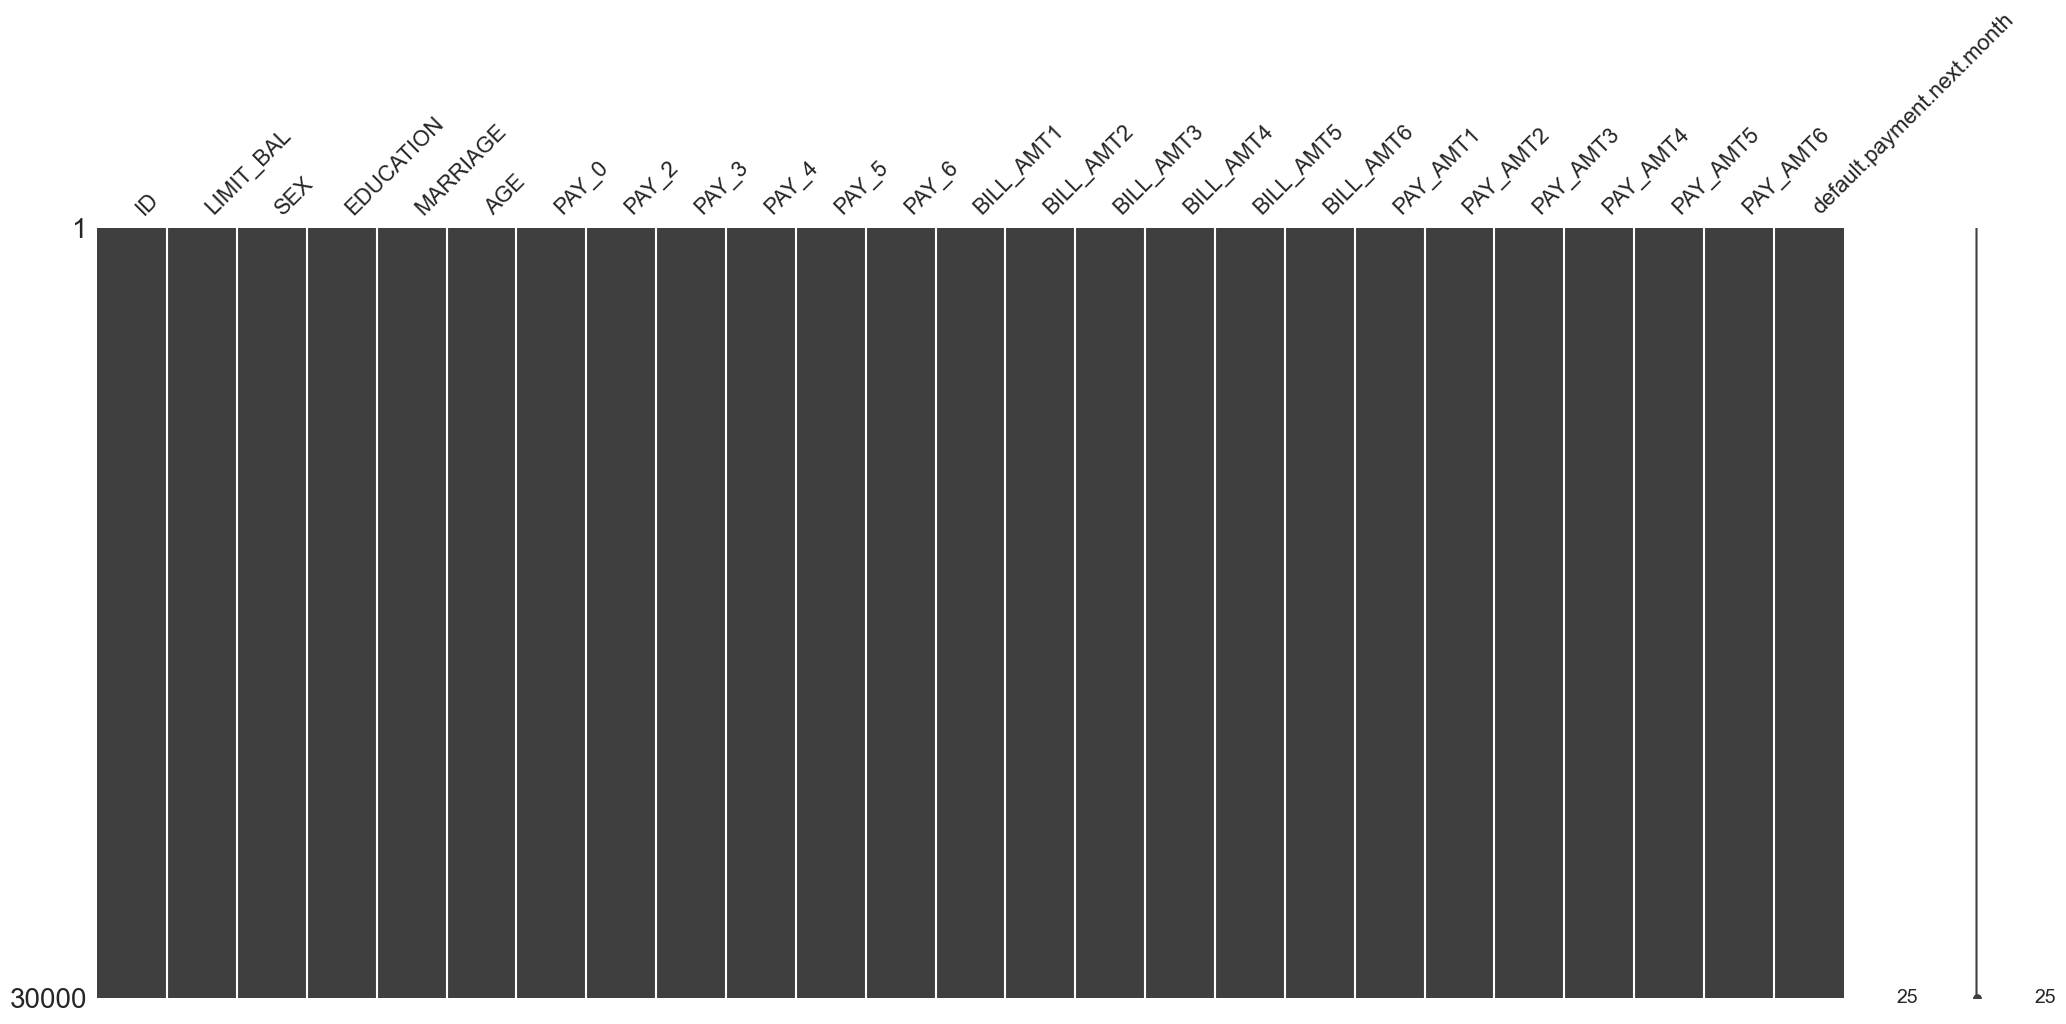

In [9]:
# !pip install missingno

import missingno as msno
import matplotlib.pyplot as plt
# Visualisation des valeurs manquantes
msno.matrix(data)
plt.show()


C:\Users\Etudiant\PycharmProjects\ProjetScoring\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Etudiant\PycharmProjects\ProjetScoring\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


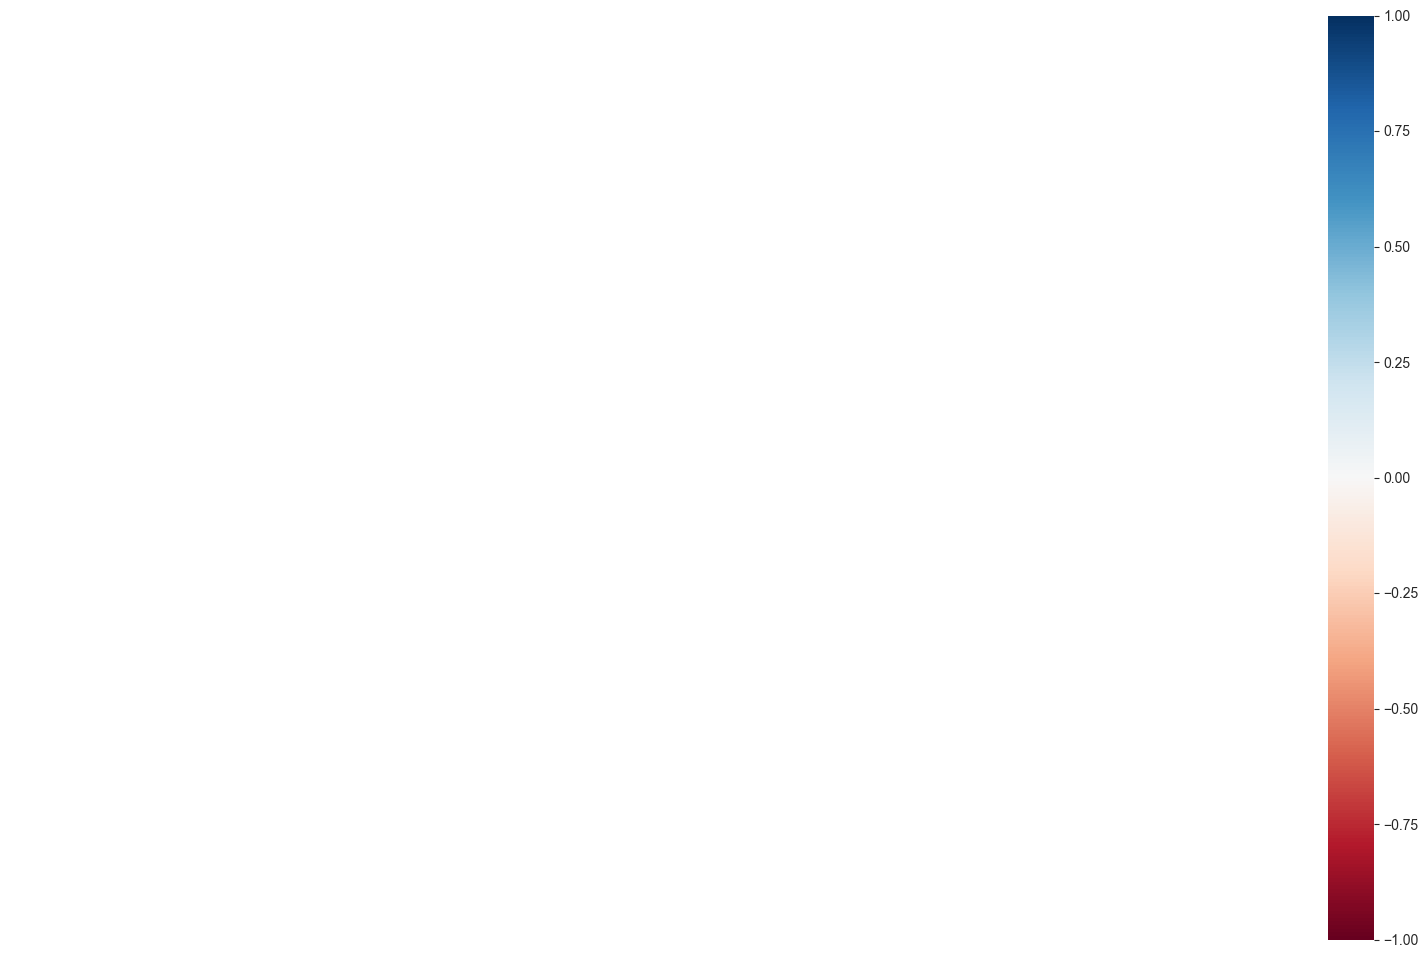

In [10]:

msno.heatmap(data)
plt.show()

# Etape 3: EDA

## Description des variables numériques

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analyze_numeric_variables(data):
    """
    Analyse les variables quantitatives d'une base de données :
    - Moyenne, médiane, écart type, minimum, maximum, quartiles
    - Boxplot, histogramme et QQ-plot
    """
    # Sélection des variables numériques
    numeric_vars = data.select_dtypes(include=['number'])

    # Calcul des statistiques descriptives
    stats_summary = numeric_vars.describe().T
    stats_summary['median'] = numeric_vars.median()

    print("\n📊 Statistiques descriptives des variables numériques :")
    print(stats_summary)

    # Visualisation des distributions
    for col in numeric_vars.columns:
        plt.figure(figsize=(15, 5))

        # Boxplot
        plt.subplot(1, 3, 1)
        sns.boxplot(y=numeric_vars[col], color='lightblue')
        plt.title(f'Boxplot de {col}')

        # Histogramme
        plt.subplot(1, 3, 2)
        sns.histplot(numeric_vars[col], bins=30, kde=True, edgecolor='black')
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)

        # QQ-Plot (courbe de densité)
        plt.subplot(1, 3, 3)
        stats.probplot(numeric_vars[col].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ-Plot de {col}')

        plt.tight_layout()
        plt.show()

    return stats_summary



📊 Statistiques descriptives des variables numériques :
             count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4

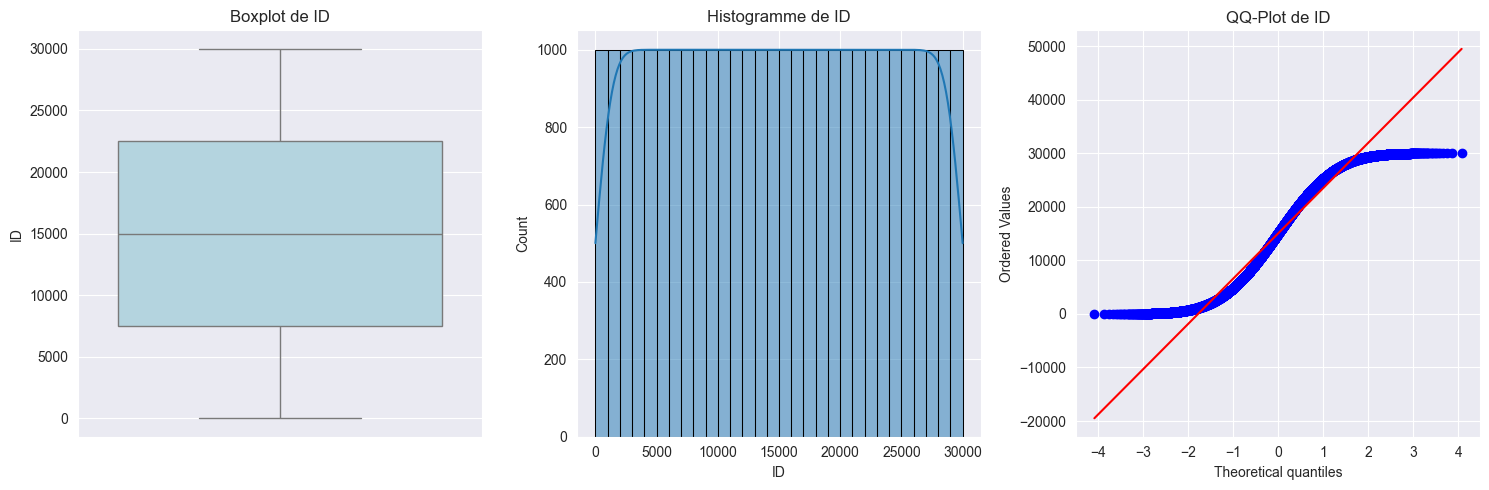

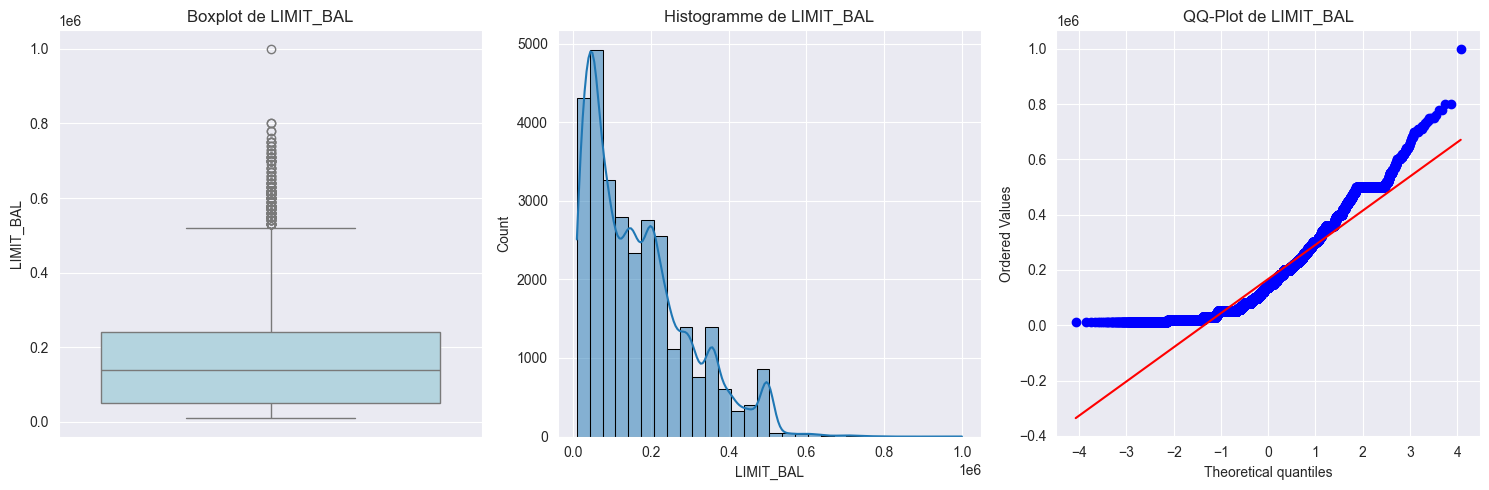

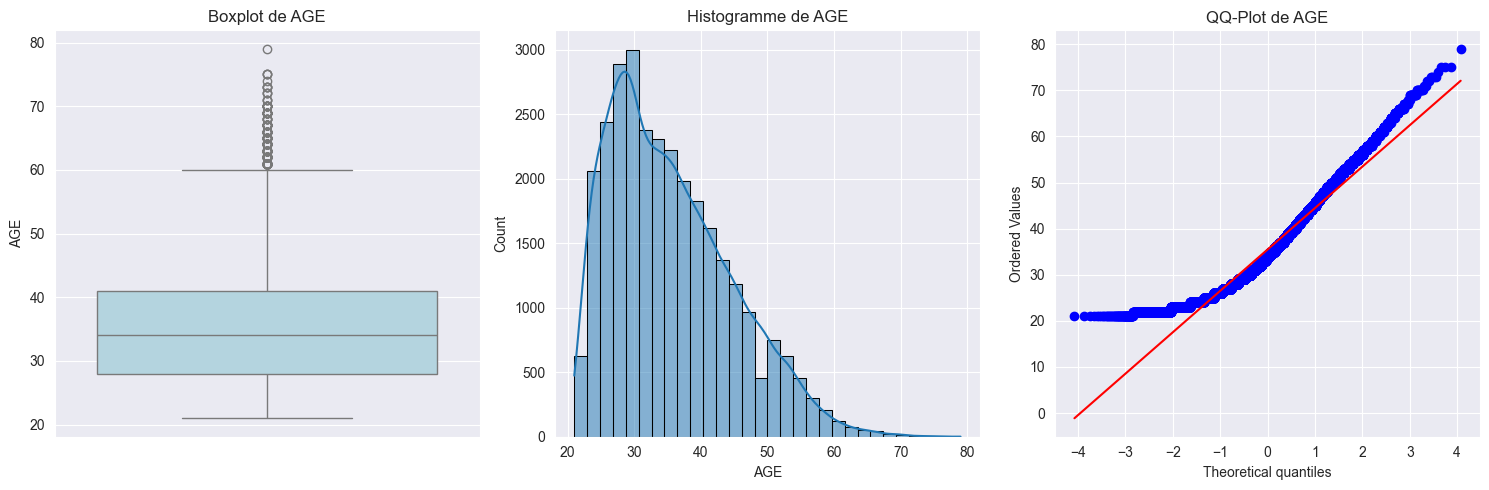

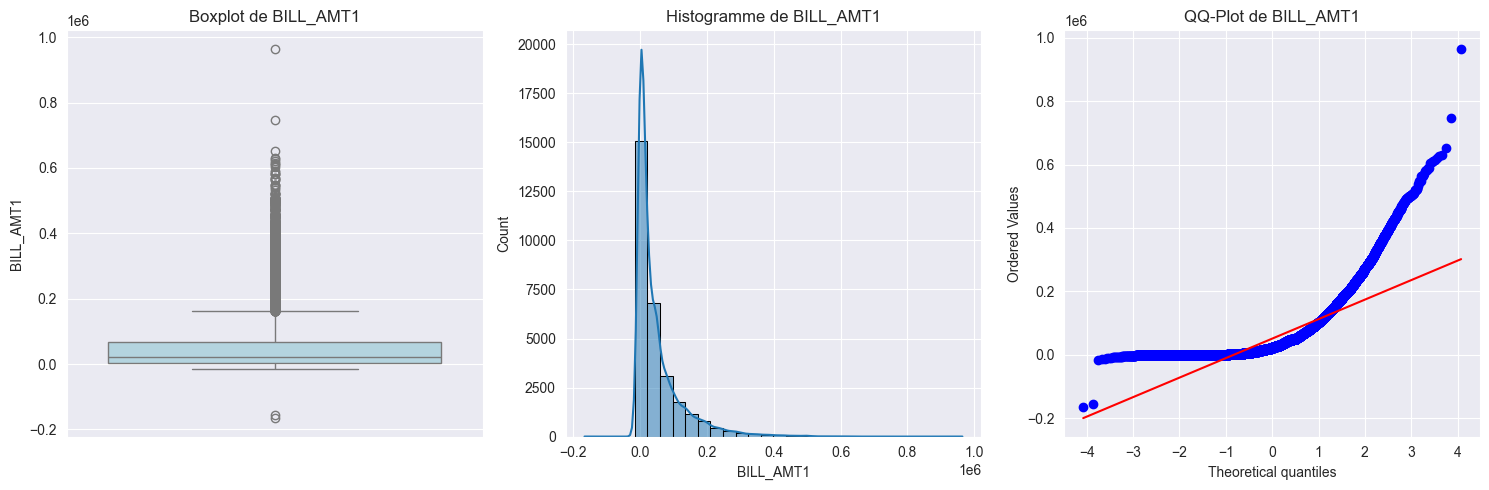

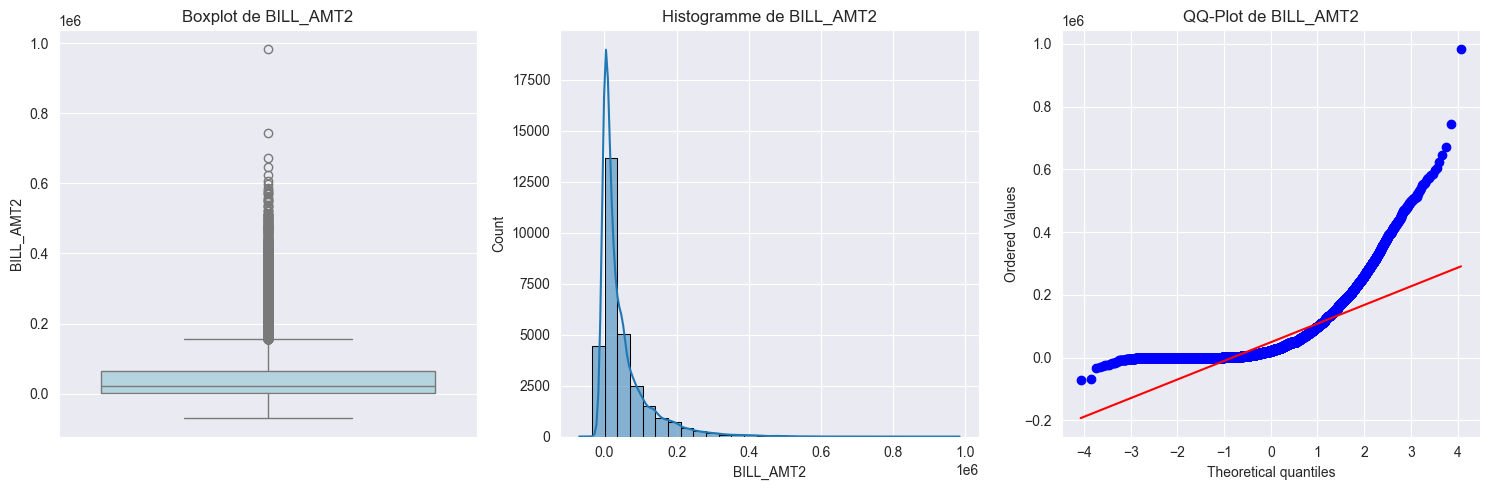

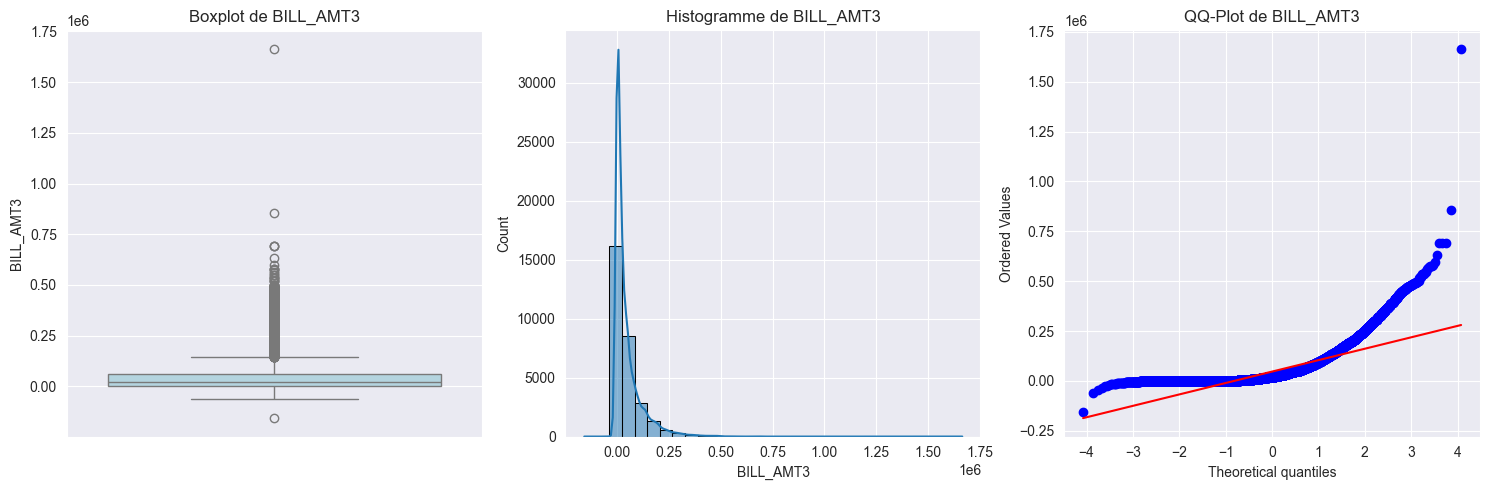

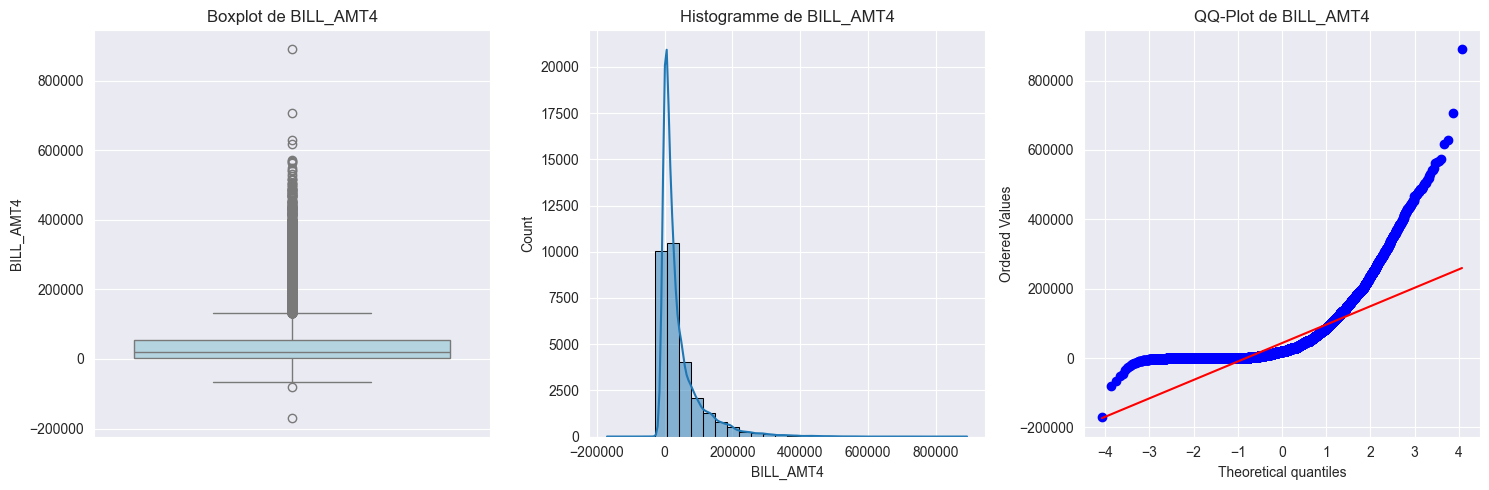

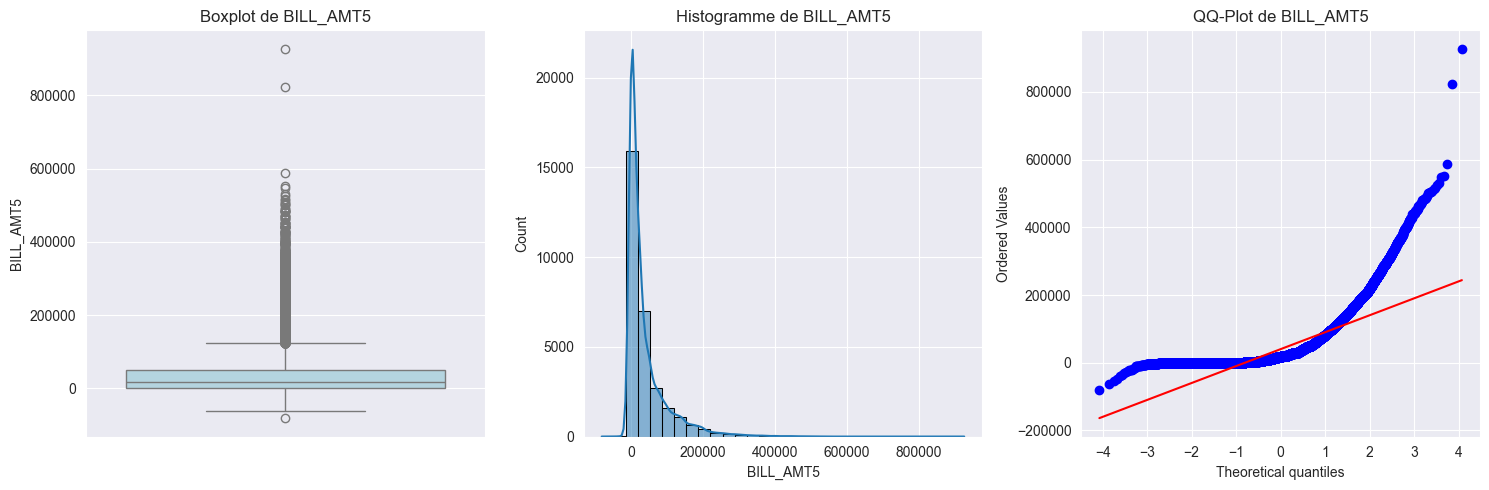

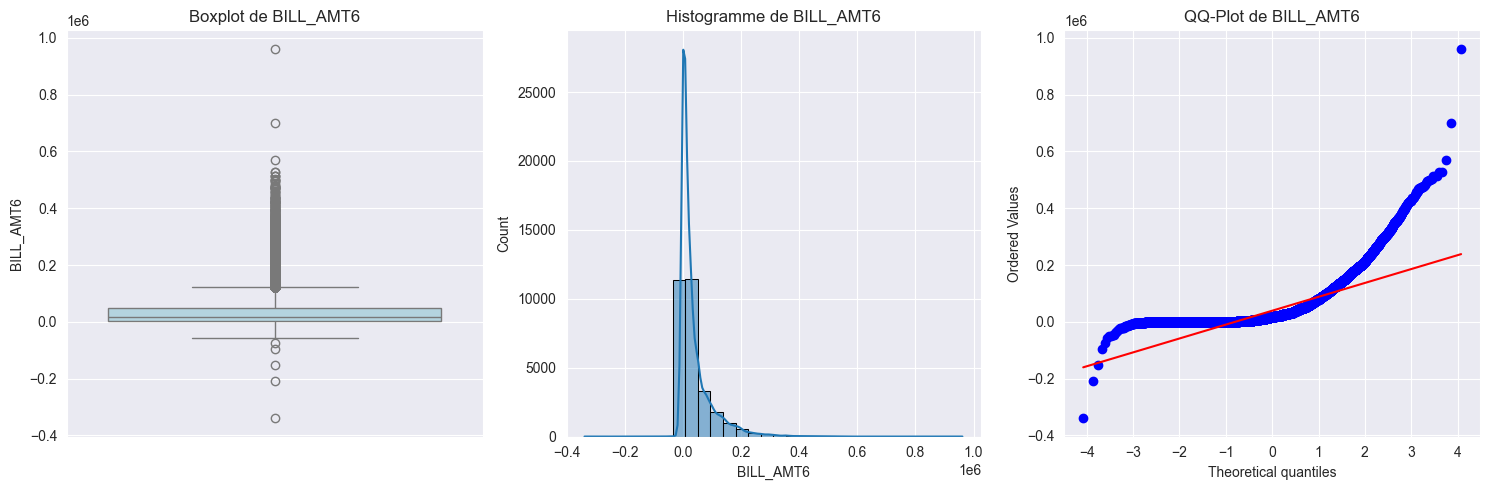

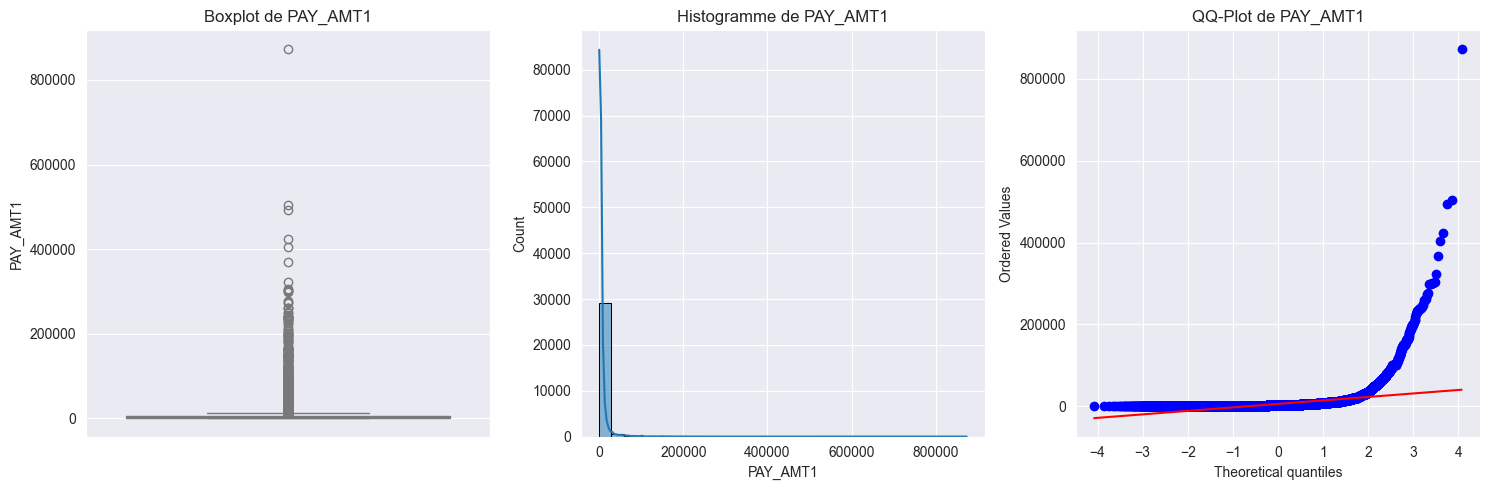

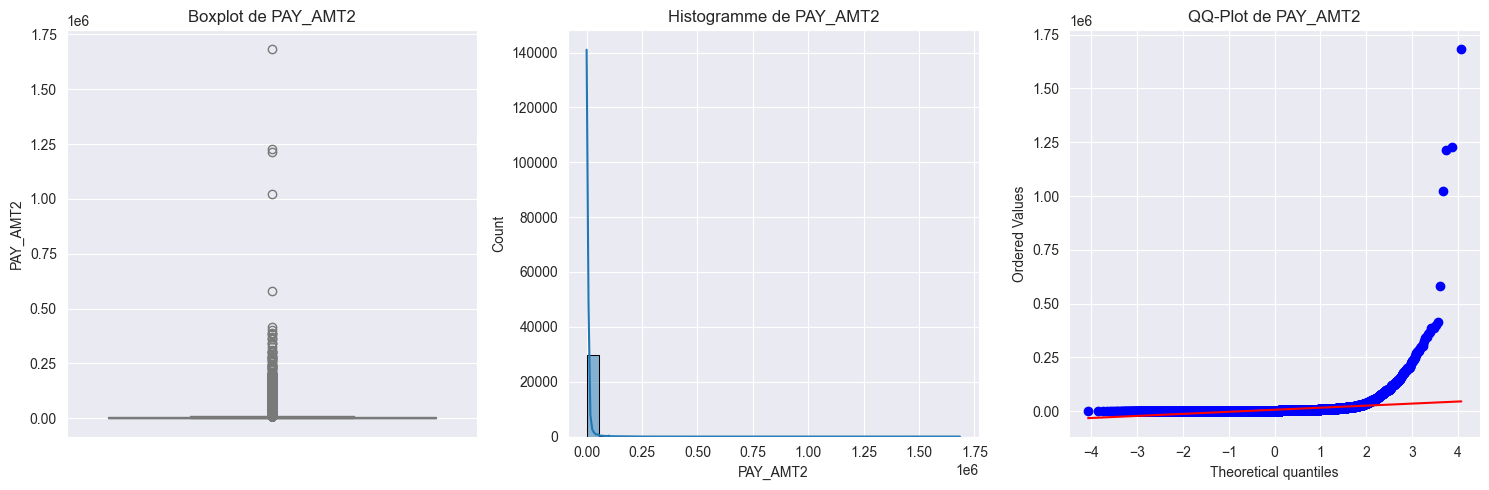

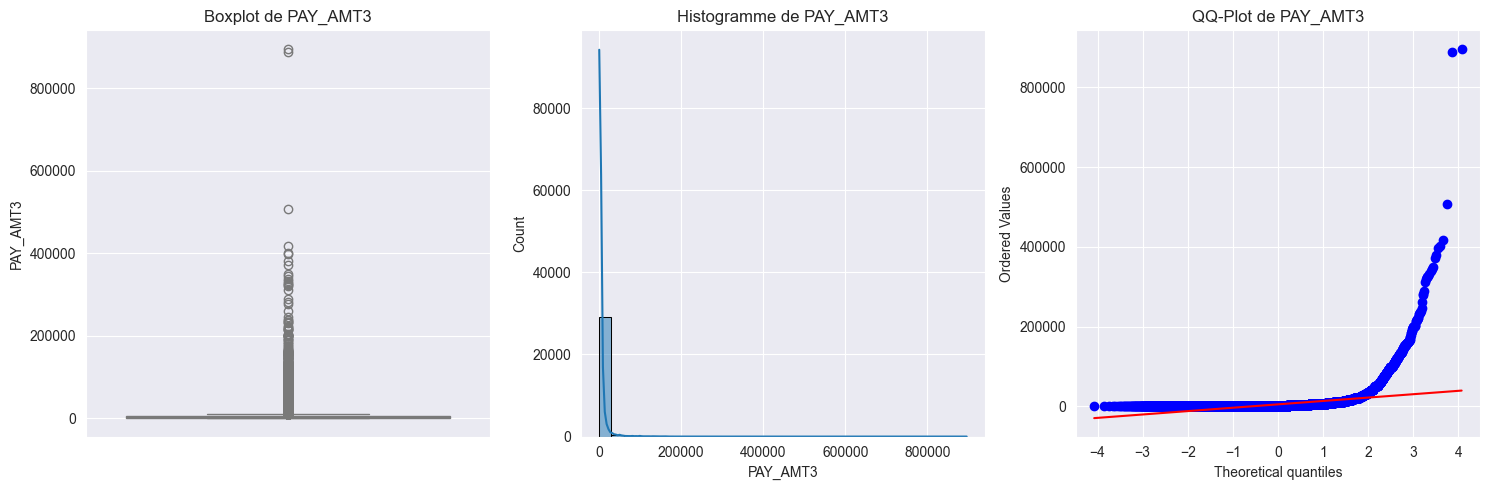

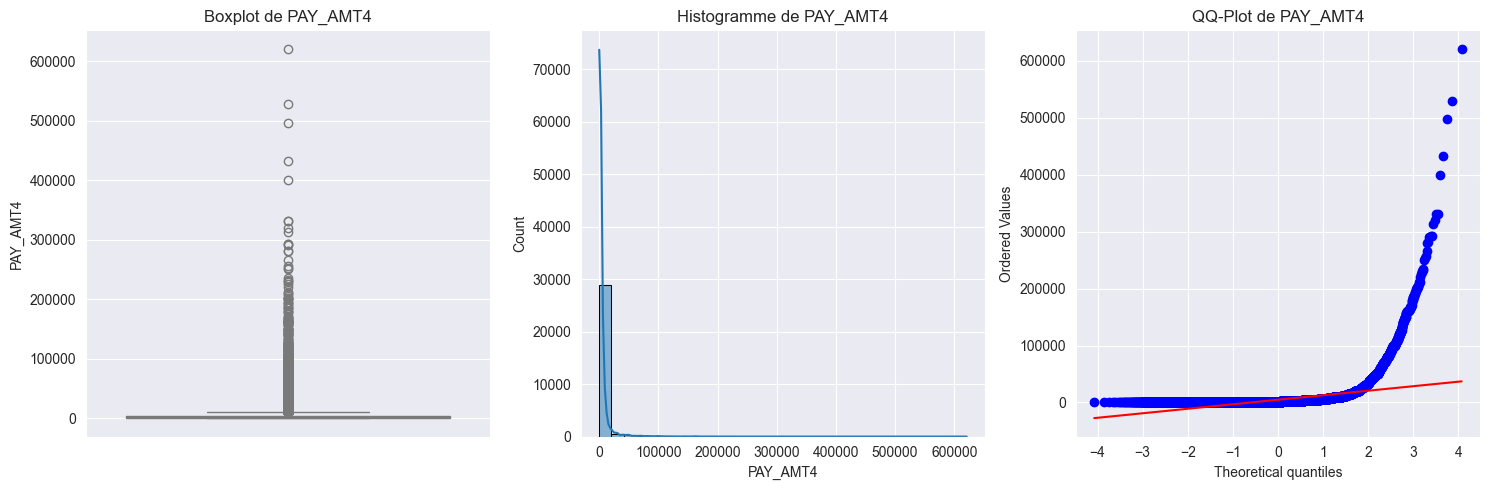

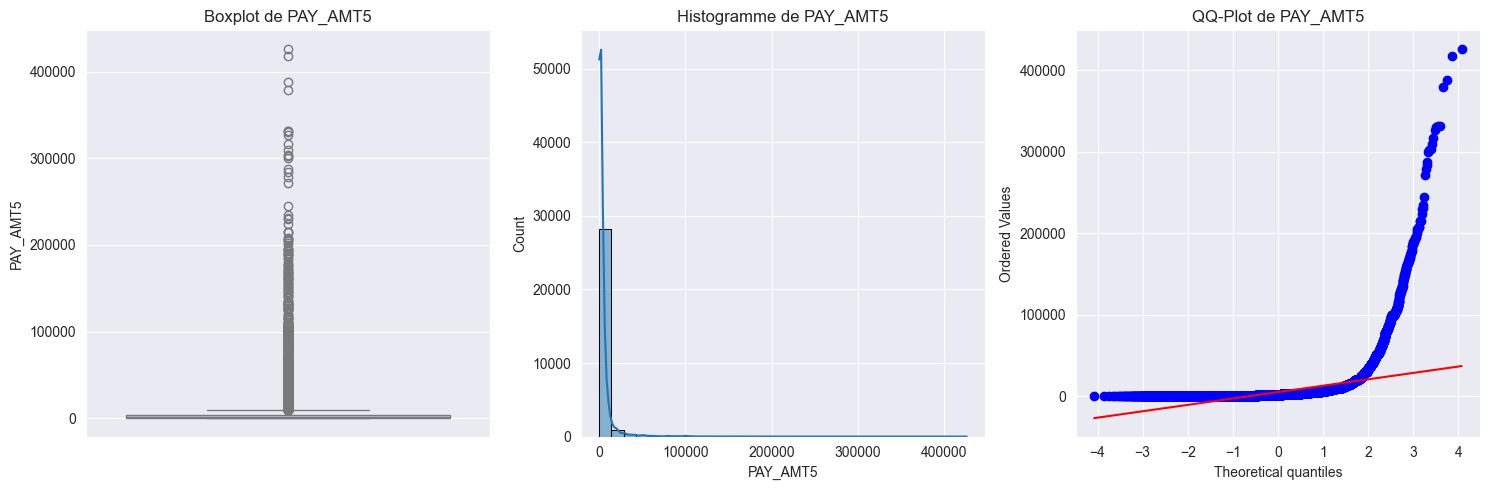

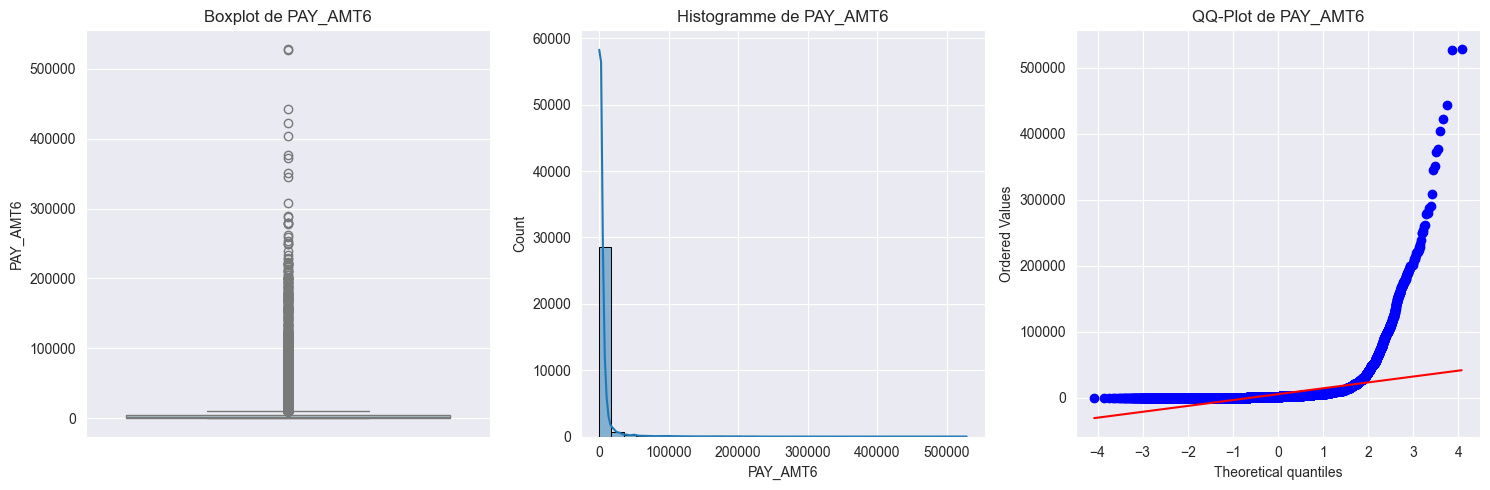

In [12]:
# Description des variables quantitatives
# Analyse des variables numériques
stats_summary = analyze_numeric_variables(data)

# Description des variables qualitatives


📊 Fréquence des modalités pour SEX :
     Effectif  Proportion (%)
SEX                          
2       18112           60.37
1       11888           39.63


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


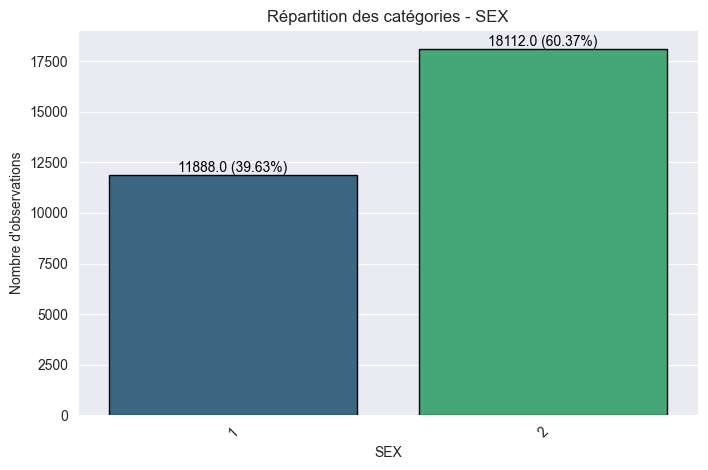


📊 Fréquence des modalités pour EDUCATION :
           Effectif  Proportion (%)
EDUCATION                          
2             14030           46.77
1             10585           35.28
3              4917           16.39
5               280            0.93
4               123            0.41
6                51            0.17
0                14            0.05


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


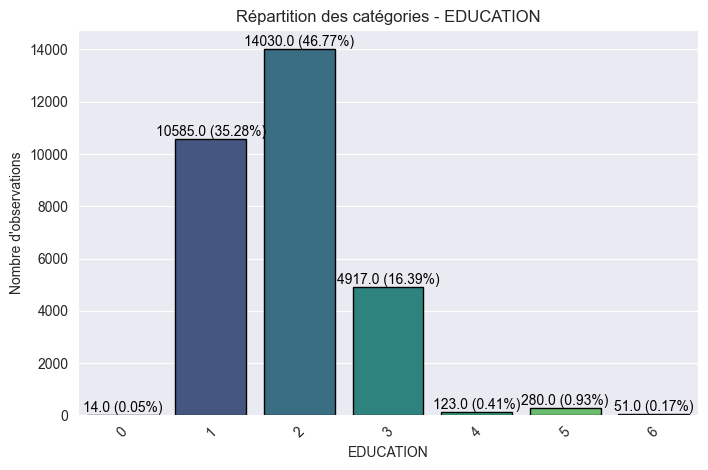


📊 Fréquence des modalités pour MARRIAGE :
          Effectif  Proportion (%)
MARRIAGE                          
2            15964           53.21
1            13659           45.53
3              323            1.08
0               54            0.18


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


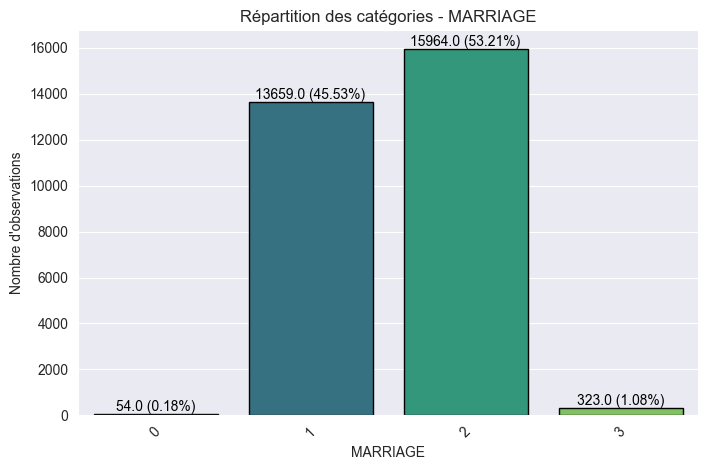


📊 Fréquence des modalités pour PAY_0 :
       Effectif  Proportion (%)
PAY_0                          
0         14737           49.12
-1         5686           18.95
1          3688           12.29
-2         2759            9.20
2          2667            8.89
3           322            1.07
4            76            0.25
5            26            0.09
8            19            0.06
6            11            0.04
7             9            0.03


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


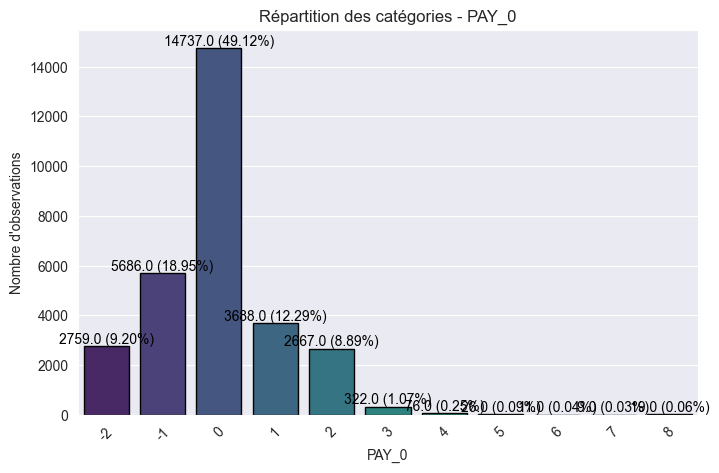


📊 Fréquence des modalités pour PAY_2 :
       Effectif  Proportion (%)
PAY_2                          
0         15730           52.43
-1         6050           20.17
2          3927           13.09
-2         3782           12.61
3           326            1.09
4            99            0.33
1            28            0.09
5            25            0.08
7            20            0.07
6            12            0.04
8             1            0.00


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


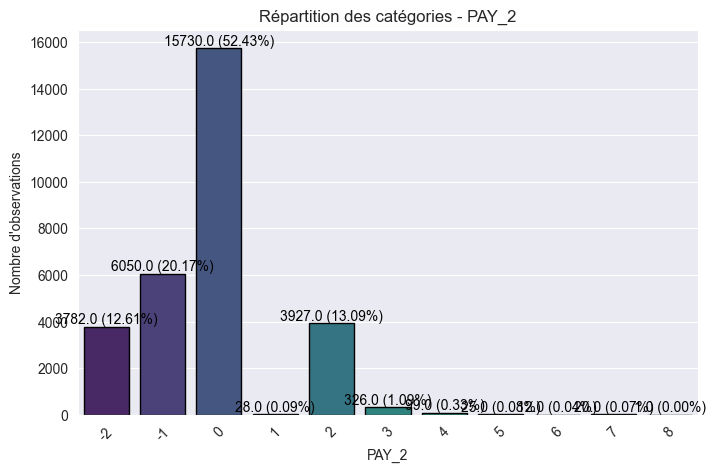


📊 Fréquence des modalités pour PAY_3 :
       Effectif  Proportion (%)
PAY_3                          
0         15764           52.55
-1         5938           19.79
-2         4085           13.62
2          3819           12.73
3           240            0.80
4            76            0.25
7            27            0.09
6            23            0.08
5            21            0.07
1             4            0.01
8             3            0.01


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


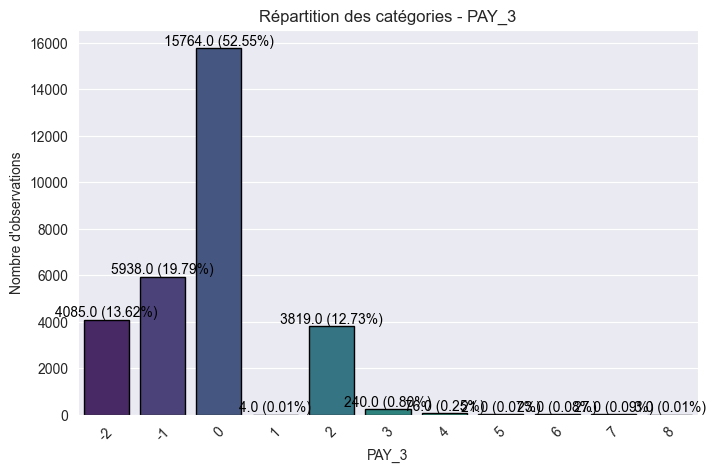


📊 Fréquence des modalités pour PAY_4 :
       Effectif  Proportion (%)
PAY_4                          
0         16455           54.85
-1         5687           18.96
-2         4348           14.49
2          3159           10.53
3           180            0.60
4            69            0.23
7            58            0.19
5            35            0.12
6             5            0.02
1             2            0.01
8             2            0.01


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


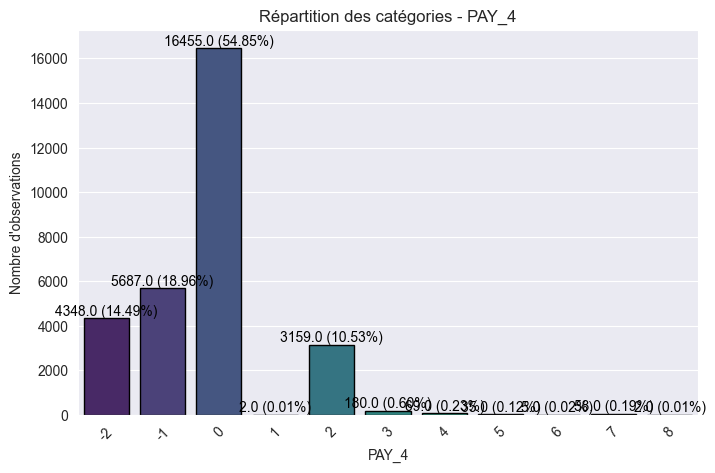


📊 Fréquence des modalités pour PAY_5 :
       Effectif  Proportion (%)
PAY_5                          
0         16947           56.49
-1         5539           18.46
-2         4546           15.15
2          2626            8.75
3           178            0.59
4            84            0.28
7            58            0.19
5            17            0.06
6             4            0.01
8             1            0.00


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


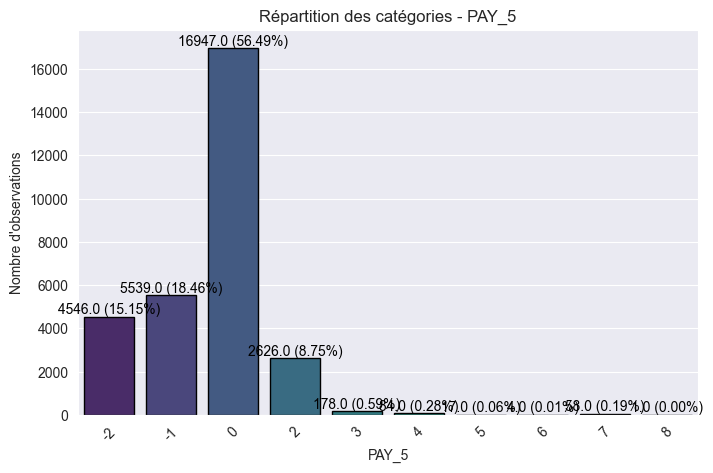


📊 Fréquence des modalités pour PAY_6 :
       Effectif  Proportion (%)
PAY_6                          
0         16286           54.29
-1         5740           19.13
-2         4895           16.32
2          2766            9.22
3           184            0.61
4            49            0.16
7            46            0.15
6            19            0.06
5            13            0.04
8             2            0.01


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


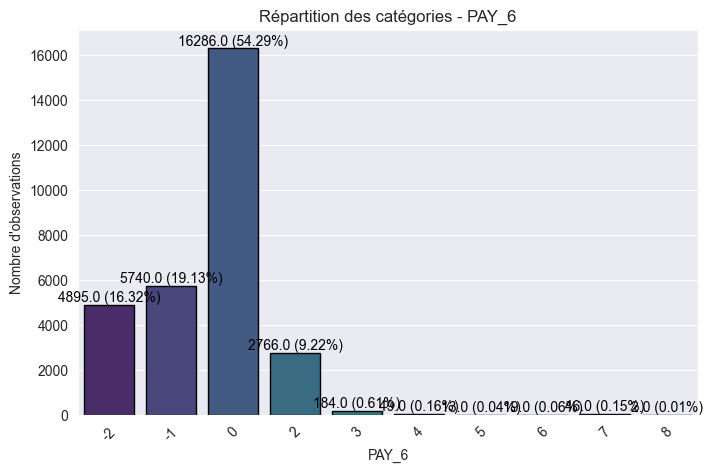


📊 Fréquence des modalités pour default.payment.next.month :
                            Effectif  Proportion (%)
default.payment.next.month                          
0                              23364           77.88
1                               6636           22.12


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


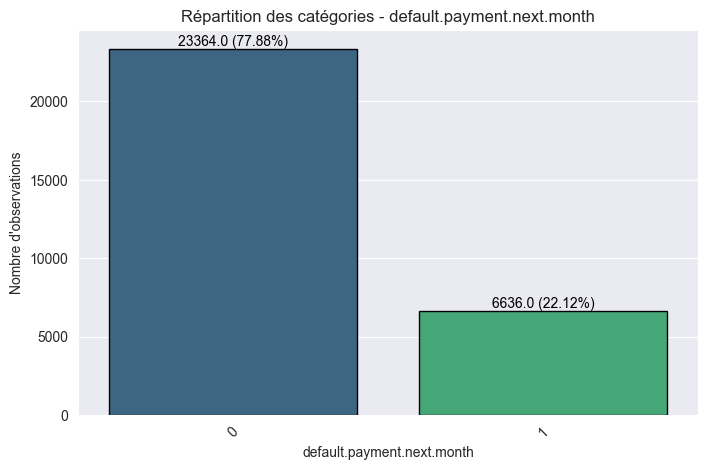

In [13]:
def analyze_categorical_variables(data):
    """
    Analyse des variables qualitatives :
    - Tableau de fréquences
    - Diagramme en barres avec effectifs et proportions
    """
    categorical_vars = data.select_dtypes(include=['object','category'])

    for col in categorical_vars.columns:
        freq_table = data[col].value_counts()
        proportions = (freq_table / len(data) * 100).round(2)
        freq_df = pd.DataFrame({"Effectif": freq_table, "Proportion (%)": proportions})

        print(f"\n📊 Fréquence des modalités pour {col} :")
        print(freq_df)

        # Barplot
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')
        plt.title(f"Répartition des catégories - {col}")
        plt.xlabel(col)
        plt.ylabel("Nombre d'observations")
        plt.xticks(rotation=45)

        # Ajout des effectifs et proportions au-dessus des barres
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height} ({(height/len(data)*100):.2f}%)',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

        plt.show()


# Analyse des variables qualitatives
analyze_categorical_variables(data)

# Regroupement des Modalités Rares

In [14]:
# Regroupement des modalités rares avec une logique métier
data['EDUCATION'] = data['EDUCATION'].replace({5: 'Autres', 6: 'Autres', 0: 'Autres', 4: 'Autres'})

# Regroupement des statuts matrimoniaux
data['MARRIAGE'] = data['MARRIAGE'].replace({3: 'Autres', 0: 'Autres'})

# Regroupement des statuts de paiement
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    data[col] = data[col].replace({-2: 'Paiement à temps', -1: 'Paiement à temps', 0: 'Paiement à temps',
                                    1: 'Retard', 2: 'Retard',
                                    3: 'Retard', 4: 'Retard', 5: 'Retard',
                                    6: 'Retard', 7: 'Retard', 8: 'Retard'})


📊 Fréquence des modalités pour SEX :
     Effectif  Proportion (%)
SEX                          
2       18112           60.37
1       11888           39.63


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


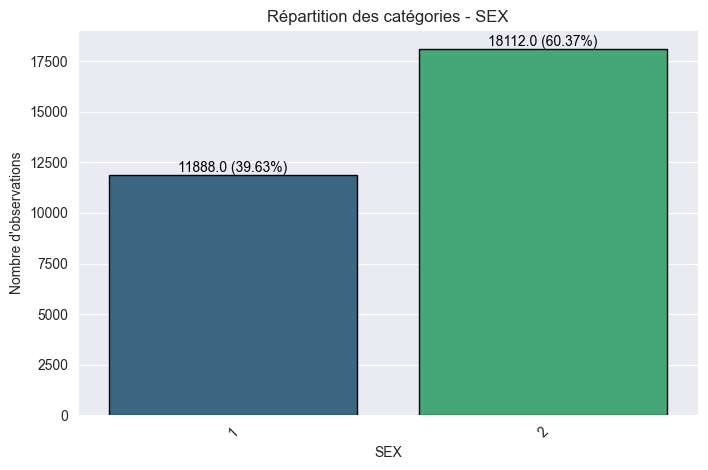

C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')



📊 Fréquence des modalités pour EDUCATION :
           Effectif  Proportion (%)
EDUCATION                          
2             14030           46.77
1             10585           35.28
3              4917           16.39
Autres          468            1.56


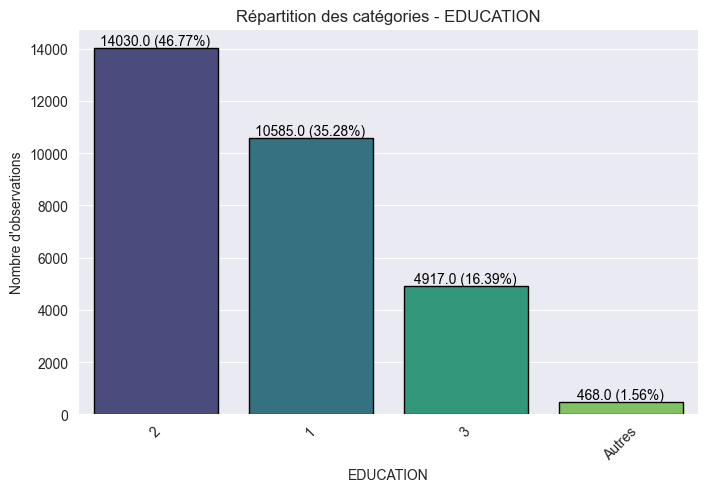


📊 Fréquence des modalités pour MARRIAGE :
          Effectif  Proportion (%)
MARRIAGE                          
2            15964           53.21
1            13659           45.53
Autres         377            1.26


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


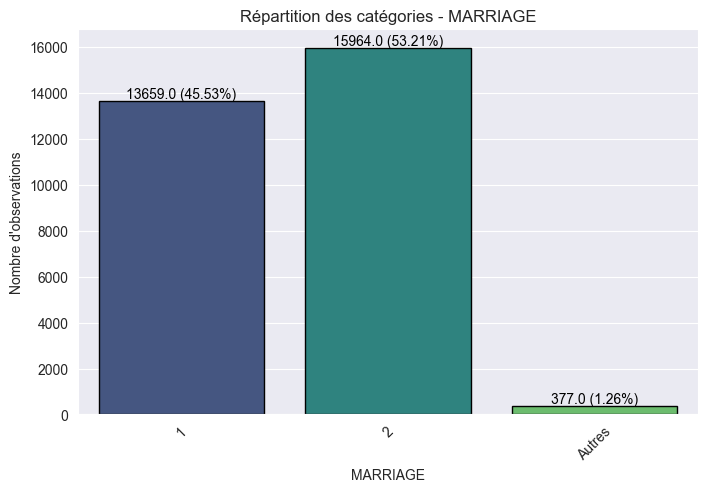

C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')



📊 Fréquence des modalités pour PAY_0 :
                  Effectif  Proportion (%)
PAY_0                                     
Paiement à temps     23182           77.27
Retard                6818           22.73


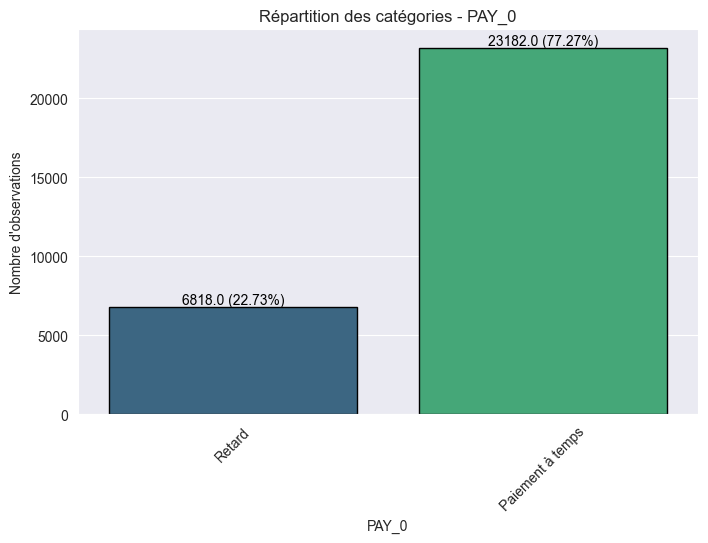


📊 Fréquence des modalités pour PAY_2 :
                  Effectif  Proportion (%)
PAY_2                                     
Paiement à temps     25562           85.21
Retard                4438           14.79


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


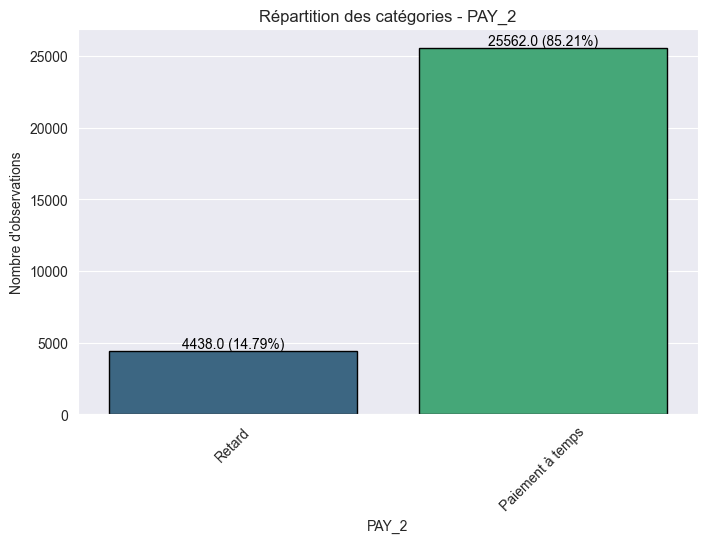


📊 Fréquence des modalités pour PAY_3 :
                  Effectif  Proportion (%)
PAY_3                                     
Paiement à temps     25787           85.96
Retard                4213           14.04


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


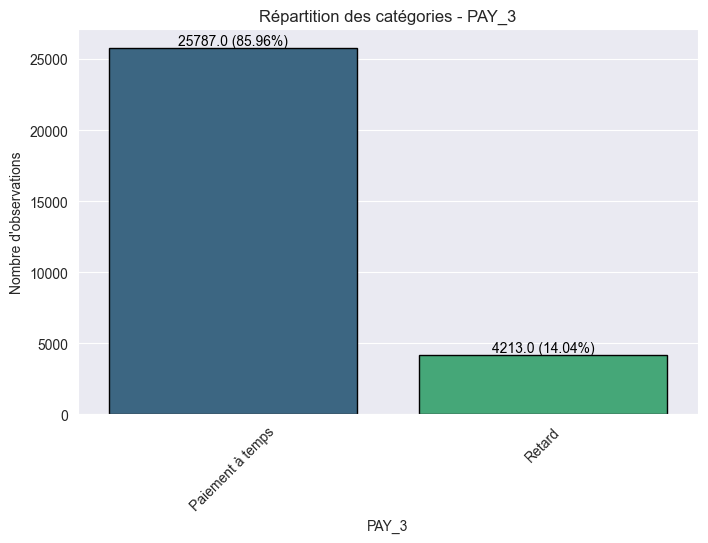


📊 Fréquence des modalités pour PAY_4 :
                  Effectif  Proportion (%)
PAY_4                                     
Paiement à temps     26490            88.3
Retard                3510            11.7


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


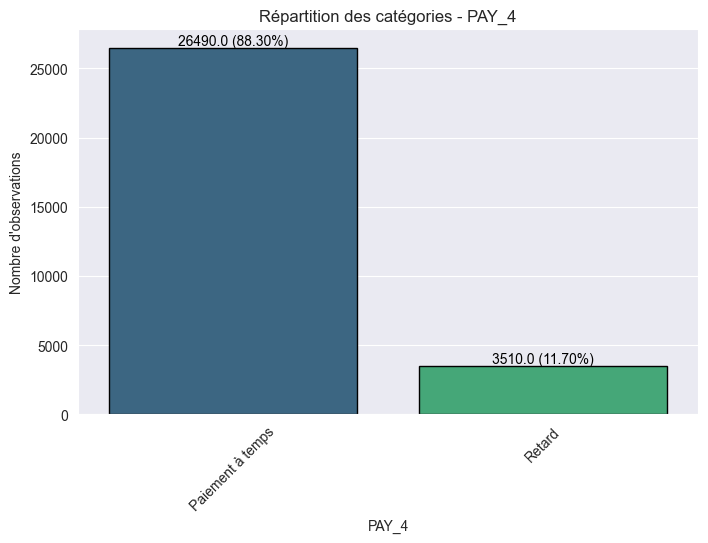


📊 Fréquence des modalités pour PAY_5 :
                  Effectif  Proportion (%)
PAY_5                                     
Paiement à temps     27032           90.11
Retard                2968            9.89


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


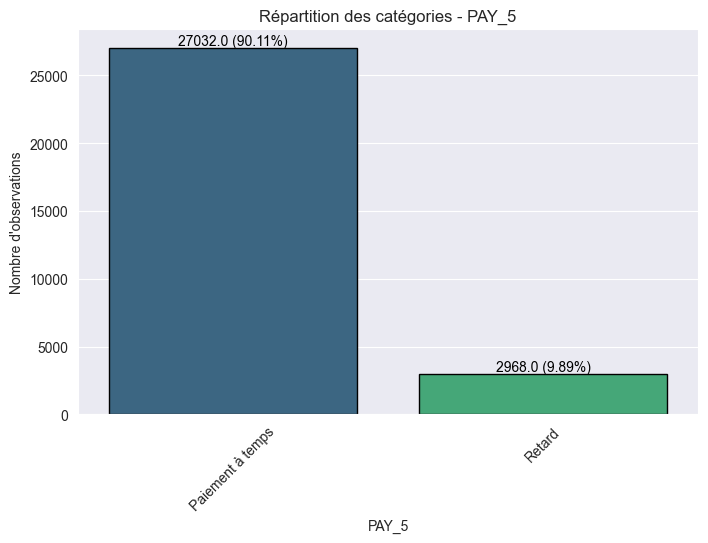


📊 Fréquence des modalités pour PAY_6 :
                  Effectif  Proportion (%)
PAY_6                                     
Paiement à temps     26921           89.74
Retard                3079           10.26


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


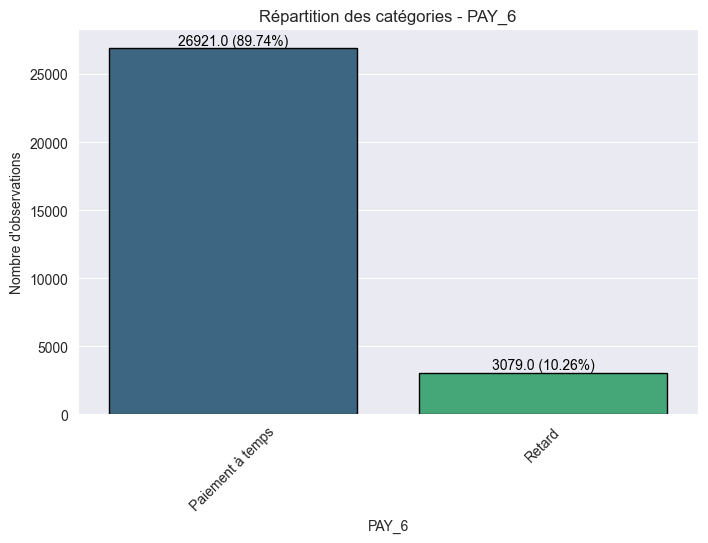


📊 Fréquence des modalités pour default.payment.next.month :
                            Effectif  Proportion (%)
default.payment.next.month                          
0                              23364           77.88
1                               6636           22.12


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_4168\1040842910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], palette='viridis', edgecolor='black')


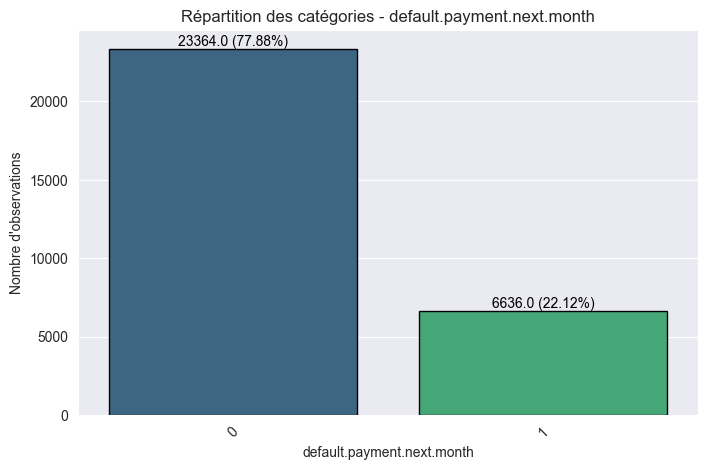

In [15]:
# Analyse des variables qualitatives
analyze_categorical_variables(data)